In [2]:
from scipy.spatial import ConvexHull
from scipy.spatial import Delaunay
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def polygon_check(actual_point, polygon_points):
    '''
    Constructs convex hull from list of tuples of points (polygon_points)
    that define a polygon and determines whether 
    actual_point is within the hull.
    Inputs:
        actual_point (tuple): test point.
        polygon_points (list of tuples): Defines polygon;
        assumed (lat, lon) pairs
    Returns:
        mask[0] (boolean): whether point is within polygon.
    '''
    x = [point[0] for point in polygon_points]
    y = [point[1] for point in polygon_points]
    for point in polygon_points:
        x.append(point[0])
        y.append(point[1])
    hull_points = np.column_stack((x,y))
    predict_point = np.array([[actual_point[0],actual_point[1]]])

    if not isinstance(hull_points,Delaunay):
            hull = Delaunay(hull_points)
    mask = hull.find_simplex(predict_point)>=0
    return mask[0]


def polygon_check2(actual_points, polygon_points):
    '''
    Constructs convex hull from list of tuples of points (polygon_points)
    that define a polygon and determines whether 
    list of points (actual_points) are within the hull.
    Inputs:
        actual_points (list of tuples): test points.
        polygon_points (list of tuples): define polygon;
        assumed (lat, lon) pairs
    Returns:
        mask (pandas mask)): whether points are within polygon.
    '''
    polygon_x = [point[0] for point in polygon_points]
    polygon_y = [point[1] for point in polygon_points]
    actual_points_x = [point[0] for point in actual_points]
    actual_points_y = [point[1] for point in actual_points]
    hull_points = np.column_stack((polygon_x,polygon_y))
    predict_point = np.column_stack((actual_points_x,actual_points_y))

    if not isinstance(hull_points,Delaunay):
            hull = Delaunay(hull_points)
    mask = hull.find_simplex(predict_point)>=0
    return mask

def location_filter(dataframe, polygon_points, lat_column, lon_column):
    '''
    Filters a dataframe for points within a polygon defined by
    a list of tuple points.
    Inputs:
        dataframe: the dataframe to be filtered.
        polygon_points: a list of tuples defining the points.
        lat_column: string representing the latitude in dataframe.
        lon_column: string representing the longitude in dataframe.
    Returns:
        The filtered dataframe.
    '''
    polygon_lat = [point[0] for point in polygon_points]
    polygon_lon = [point[1] for point in polygon_points]
    actual_points_lat = dataframe[lat_column]
    actual_points_lon = dataframe[lon_column]
    hull_points = np.column_stack((polygon_lat, polygon_lon))
    predict_point = np.column_stack((actual_points_lat, actual_points_lon))
    
    if not isinstance(hull_points,Delaunay):
            hull = Delaunay(hull_points)
    mask = hull.find_simplex(predict_point)>=0
    return dataframe[mask]
    
    
    
    

In [8]:
_log_file='../../backup/crime_log_small.csv'

In [9]:
df = pd.read_csv(_log_file,parse_dates=True)

In [10]:
df.sort_values(["Latitude","Longitude"])

ID Case Number                    Date  \
88  8316989    HT551163  10/20/2011 12:00:00 PM   
44  8316899    HT550695  10/20/2011 05:30:00 AM   
57  8316919    HT551141  10/20/2011 11:50:00 AM   
61  8316927    HT550899  05/05/2011 09:00:00 AM   
33  8316882    HT549162  10/19/2011 06:42:00 AM   
91  8316993    HT549180  10/18/2011 08:00:00 PM   
34  8316884    HT544972  10/16/2011 04:30:00 AM   
4   8316814    HT551005  10/20/2011 10:40:00 AM   
12  8316839    HT551049  10/20/2011 08:50:00 AM   
58  8316921    HT551082  10/20/2011 11:20:00 AM   
51  8316912    HT550919  10/19/2011 09:30:00 PM   
93  8316998    HT550833  10/18/2011 02:00:00 PM   
69  8316954    HT551090  10/20/2011 11:50:00 AM   
0   8316800    HT550945  08/11/2011 11:00:00 AM   
74  8316962    HT549838  10/19/2011 12:45:00 PM   
84  8316982    HT551152  10/20/2011 06:00:00 AM   
40  8316893    HT551023  10/20/2011 02:00:00 AM   
71  8316957    HT551093  10/08/2011 12:30:00 PM   
59  8316922    HT550923  10/20/2011 01:30:00 AM   
10  8316827    HT550963  09/01/2011 04:00:00 PM   
8   8316825    HT549690  10/19/2011 12:51:00 PM   
2   8316806    HT550706  10/20/2011 05:45:00 AM   
56  8316918    HT551059  10/20/2011 10:15:00 AM   
3   8316811    HT539324  10/12/2011 12:23:52 PM   
72  8316958    HT551116  10/20/2011 08:45:00 AM   
47  8316902    HT550988  10/20/2011 10:25:00 AM   
87  8316987    HT551165  10/19/2011 05:30:00 PM   
46  8316901    HT549052  10/19/2011 12:01:00 AM   
80  8316975    HT551139  10/20/2011 11:50:00 AM   
38  8316890    HT532649  10/07/2011 11:46:00 PM   
..      ...         ...                     ...   
39  8316892    HT551045  10/20/2011 10:45:00 AM   
96  8317002    HT521568  10/06/2011 07:00:00 AM   
63  8316930    HT551147  10/15/2011 12:00:00 PM   
55  8316917    HT551070  10/20/2011 11:15:00 AM   
9   8316826    HT549865  10/19/2011 06:00:00 AM   
77  8316968    HT549402  10/18/2011 01:30:00 PM   
85  8316984    HT545347  10/16/2011 12:19:19 PM   
68  8316947    HT551114  10/20/2011 11:40:00 AM   
6   8316822    HT551031  10/19/2011 02:00:00 AM   
14  8316842    HT438248  08/08/2011 06:00:00 AM   
94  8316999    HT548100  10/17/2011 04:00:00 AM   
24  8316869    HT550891  10/20/2011 12:01:00 AM   
7   8316824    HT551032  10/20/2011 12:00:00 AM   
23  8316863    HT546138  10/15/2011 03:30:00 PM   
64  8316938    HT537420  10/09/2011 12:00:00 PM   
22  8316861    HT550987  10/20/2011 07:30:00 AM   
37  8316889    HT550997  10/20/2011 09:10:00 AM   
78  8316969    HT549689  10/19/2011 08:30:00 AM   
26  8316871    HT549680  10/19/2011 01:03:00 PM   
31  8316880    HT549802  10/19/2011 12:00:00 PM   
41  8316894    HT550772  10/20/2011 07:10:00 AM   
36  8316887    HT551046  10/20/2011 11:10:00 AM   
95  8317000    HT549688  09/21/2011 09:00:00 AM   
83  8316981    HT551177  10/20/2011 08:00:00 AM   
11  8316838    HT548010  10/17/2011 03:20:00 PM   
67  8316942    HT551006  10/19/2011 02:15:00 PM   
65  8316940    HT551098  10/19/2011 03:00:00 PM   
25  8316870    HT550911  10/20/2011 09:39:00 AM   
62  8316928    HT551061  10/19/2011 10:00:00 PM   
35  8316886    HT549777  10/19/2011 02:10:00 PM   

                                  Block  IUCR         Primary Type  \
88               132XX S CARONDOLET AVE  1310      CRIMINAL DAMAGE   
44                   122XX S HALSTED ST  1310      CRIMINAL DAMAGE   
57                  111XX S ASHLAND AVE  0486              BATTERY   
61                     010XX W 109TH ST  1150   DECEPTIVE PRACTICE   
33                  105XX S WESTERN AVE  0610             BURGLARY   
91                    106XX S HOXIE AVE  0810                THEFT   
34                   103XX S HALSTED ST  1310      CRIMINAL DAMAGE   
4                  103XX S ELIZABETH ST  0484              BATTERY   
12                     102XX S AVENUE N  0430              BATTERY   
58                       100XX S MAY ST  1310      CRIMINAL DAMAGE   
51                     096XX S GREEN ST  1310      CRIMINAL DAMAGE   
93    

In [11]:
polygon = [(41.80,-87.70),(41.95,-87.70),(41.80,-87.60),(41.95,-87.60)]
p2 = [(41.80,-87.70),(41.95,-87.70),(41.80,-87.60),(41.95,-87.60),(43,-87.675)]
p3 = [(41.80,-87.70),(41.95,-87.70),(41.80,-87.60),(41.95,-87.60),(43,-87.675),(41.65,-87.675)]

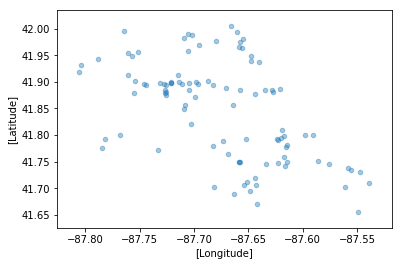

In [12]:
df.plot(kind='scatter', x=["Longitude"], y=["Latitude"], alpha=0.4)
#plt.line(x=[point[1] for point in polygon], y=[point[0] for point in polygon], alpha=0.4)
#plt.show()

In [19]:
df2 = location_filter(df, polygon, 'Latitude','Longitude')
df2.shape[0]


17

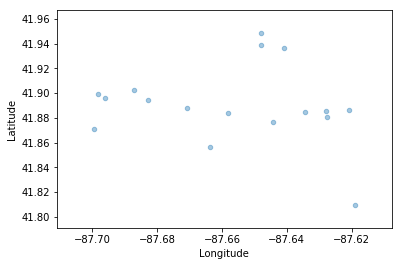

In [103]:
df2.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4)

In [104]:
df3 = location_filter(df, p2, 'Latitude','Longitude')

In [106]:
df3.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4)

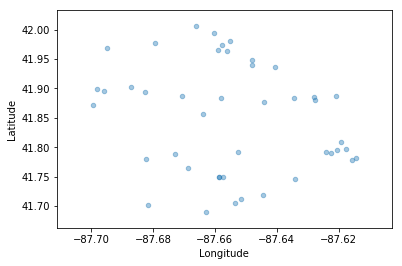

In [109]:
df3 = location_filter(df, p3, 'Latitude','Longitude')
df3.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4)

In [39]:
type(data_geopoints)

geopandas.geodataframe.GeoDataFrame

In [40]:
poly = geopandas.GeoSeries({
    'square': Polygon(polygon)
})

In [41]:
poly

square    POLYGON ((41.65 -87.68000000000001, 41.75 -87....
dtype: object

In [42]:
# data_geoppoints = data_geopoints.assign(**{key: pnts.within(geom) for key, geom in poly.items()})
# df["poly_filter"] = data_geopoints.within(Polygon(polygon))
True in data_geopoints.within(Polygon(polygon))
True in data_geopoints.within(Polygon(p2))
df["poly_filter"] = data_geopoints.within(Polygon(p2))

In [43]:
df.loc[df["poly_filter"]]

Empty DataFrame
Columns: [ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location, poly_filter]
Index: []

[0 rows x 23 columns]

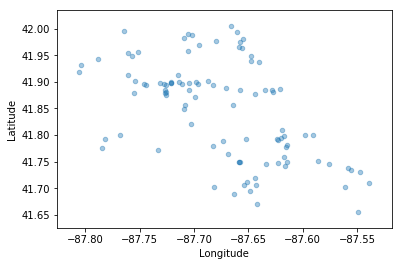

In [44]:
df = pd.read_csv(_log_file,parse_dates=True)

import matplotlib.pyplot as plt
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4)
plt.show()

In [45]:
df.loc[(df["Latitude"] > 41.65)
        & (df["Latitude"] <= 41.75)
        & (df["Longitude"] > -87.68)
        & (df["Longitude"] <= -87.54)]

ID Case Number                    Date  \
0   8316800    HT550945  08/11/2011 11:00:00 AM   
4   8316814    HT551005  10/20/2011 10:40:00 AM   
8   8316825    HT549690  10/19/2011 12:51:00 PM   
10  8316827    HT550963  09/01/2011 04:00:00 PM   
34  8316884    HT544972  10/16/2011 04:30:00 AM   
40  8316893    HT551023  10/20/2011 02:00:00 AM   
44  8316899    HT550695  10/20/2011 05:30:00 AM   
51  8316912    HT550919  10/19/2011 09:30:00 PM   
57  8316919    HT551141  10/20/2011 11:50:00 AM   
58  8316921    HT551082  10/20/2011 11:20:00 AM   
59  8316922    HT550923  10/20/2011 01:30:00 AM   
61  8316927    HT550899  05/05/2011 09:00:00 AM   
69  8316954    HT551090  10/20/2011 11:50:00 AM   
71  8316957    HT551093  10/08/2011 12:30:00 PM   
74  8316962    HT549838  10/19/2011 12:45:00 PM   
84  8316982    HT551152  10/20/2011 06:00:00 AM   
88  8316989    HT551163  10/20/2011 12:00:00 PM   
91  8316993    HT549180  10/18/2011 08:00:00 PM   
93  8316998    HT550833  10/18/2011 02:00:00 PM   

                                  Block  IUCR         Primary Type  \
0                 086XX S MARQUETTE AVE  1120   DECEPTIVE PRACTICE   
4                  103XX S ELIZABETH ST  0484              BATTERY   
8                        079XX S ADA ST  2820        OTHER OFFENSE   
10                  079XX S LOOMIS BLVD  0610             BURGLARY   
34                   103XX S HALSTED ST  1310      CRIMINAL DAMAGE   
40                  081XX S STEWART AVE  0810                THEFT   
44                   122XX S HALSTED ST  1310      CRIMINAL DAMAGE   
51                     096XX S GREEN ST  1310      CRIMINAL DAMAGE   
57                  111XX S ASHLAND AVE  0486              BATTERY   
58                       100XX S MAY ST  1310      CRIMINAL DAMAGE   
59  080XX S DR MARTIN LUTHER KING JR DR  0430              BATTERY   
61                     010XX W 109TH ST  1150   DECEPTIVE PRACTICE   
69                 088XX S MUSKEGON AVE  0486              BATTERY   
71                   081XX S WABASH AVE  0560              ASSAULT   
74                  084XX S CALUMET AVE  0483              BATTERY   
84                 082XX S JEFFERY BLVD  0920  MOTOR VEHICLE THEFT   
88               132XX S CARONDOLET AVE  1310      CRIMINAL DAMAGE   
91                    106XX S HOXIE AVE  0810                THEFT   
93                  090XX S BRANDON AVE  1320      CRIMINAL DAMAGE   

                       Description           Location Description  Arrest  \
0                          FORGERY                      RESIDENCE   False   
4      PRO EMP HANDS NO/MIN INJURY       SCHOOL, PUBLIC, BUILDING    True   
8                 TELEPHONE THREAT                      APARTMENT   False   
10                  FORCIBLE ENTRY               RESIDENCE-GARAGE   False   
34                     TO PROPERTY             SMALL RETAIL STORE   False   
40                       OVER $500                         STREET   False   
44                     TO PROPERTY        RESIDENCE PORCH/HALLWAY   False   
51                     TO PROPERTY  RESIDENTIAL YARD (FRONT/BACK)   False   
57         DOMESTIC BATTERY SIMPLE                      RESIDENCE   False   
58                     TO PROPERTY                      RESIDENCE   False   
59   AGGRAVATED: OTHER DANG WEAPON                         STREET   False   
61               CREDIT CARD FRAUD                      RESIDENCE   False   
69         DOMESTIC BATTERY SIMPLE                      APARTMENT    True   
71                          SIMPLE                      RESIDENCE   False   
74  AGG PRO.EMP: OTHER DANG WEAPON       SCHOOL, PUBLIC, BUILDING   False   
84                 ATT: AUTOMOBILE                         STREET   False   
88                     TO PROPERTY               RESIDENCE-GARAGE   False   
91                       OVER $500                         STREET   False   
93                      TO VEHICLE                         STREET   False   

    Domestic              ...                W

In [46]:
df.sort_values(["Latitude","Longitude"])

ID Case Number                    Date  \
88  8316989    HT551163  10/20/2011 12:00:00 PM   
44  8316899    HT550695  10/20/2011 05:30:00 AM   
57  8316919    HT551141  10/20/2011 11:50:00 AM   
61  8316927    HT550899  05/05/2011 09:00:00 AM   
33  8316882    HT549162  10/19/2011 06:42:00 AM   
91  8316993    HT549180  10/18/2011 08:00:00 PM   
34  8316884    HT544972  10/16/2011 04:30:00 AM   
4   8316814    HT551005  10/20/2011 10:40:00 AM   
12  8316839    HT551049  10/20/2011 08:50:00 AM   
58  8316921    HT551082  10/20/2011 11:20:00 AM   
51  8316912    HT550919  10/19/2011 09:30:00 PM   
93  8316998    HT550833  10/18/2011 02:00:00 PM   
69  8316954    HT551090  10/20/2011 11:50:00 AM   
0   8316800    HT550945  08/11/2011 11:00:00 AM   
74  8316962    HT549838  10/19/2011 12:45:00 PM   
84  8316982    HT551152  10/20/2011 06:00:00 AM   
40  8316893    HT551023  10/20/2011 02:00:00 AM   
71  8316957    HT551093  10/08/2011 12:30:00 PM   
59  8316922    HT550923  10/20/2011 01:30:00 AM   
10  8316827    HT550963  09/01/2011 04:00:00 PM   
8   8316825    HT549690  10/19/2011 12:51:00 PM   
2   8316806    HT550706  10/20/2011 05:45:00 AM   
56  8316918    HT551059  10/20/2011 10:15:00 AM   
3   8316811    HT539324  10/12/2011 12:23:52 PM   
72  8316958    HT551116  10/20/2011 08:45:00 AM   
47  8316902    HT550988  10/20/2011 10:25:00 AM   
87  8316987    HT551165  10/19/2011 05:30:00 PM   
46  8316901    HT549052  10/19/2011 12:01:00 AM   
80  8316975    HT551139  10/20/2011 11:50:00 AM   
38  8316890    HT532649  10/07/2011 11:46:00 PM   
..      ...         ...                     ...   
39  8316892    HT551045  10/20/2011 10:45:00 AM   
96  8317002    HT521568  10/06/2011 07:00:00 AM   
63  8316930    HT551147  10/15/2011 12:00:00 PM   
55  8316917    HT551070  10/20/2011 11:15:00 AM   
9   8316826    HT549865  10/19/2011 06:00:00 AM   
77  8316968    HT549402  10/18/2011 01:30:00 PM   
85  8316984    HT545347  10/16/2011 12:19:19 PM   
68  8316947    HT551114  10/20/2011 11:40:00 AM   
6   8316822    HT551031  10/19/2011 02:00:00 AM   
14  8316842    HT438248  08/08/2011 06:00:00 AM   
94  8316999    HT548100  10/17/2011 04:00:00 AM   
24  8316869    HT550891  10/20/2011 12:01:00 AM   
7   8316824    HT551032  10/20/2011 12:00:00 AM   
23  8316863    HT546138  10/15/2011 03:30:00 PM   
64  8316938    HT537420  10/09/2011 12:00:00 PM   
22  8316861    HT550987  10/20/2011 07:30:00 AM   
37  8316889    HT550997  10/20/2011 09:10:00 AM   
78  8316969    HT549689  10/19/2011 08:30:00 AM   
26  8316871    HT549680  10/19/2011 01:03:00 PM   
31  8316880    HT549802  10/19/2011 12:00:00 PM   
41  8316894    HT550772  10/20/2011 07:10:00 AM   
36  8316887    HT551046  10/20/2011 11:10:00 AM   
95  8317000    HT549688  09/21/2011 09:00:00 AM   
83  8316981    HT551177  10/20/2011 08:00:00 AM   
11  8316838    HT548010  10/17/2011 03:20:00 PM   
67  8316942    HT551006  10/19/2011 02:15:00 PM   
65  8316940    HT551098  10/19/2011 03:00:00 PM   
25  8316870    HT550911  10/20/2011 09:39:00 AM   
62  8316928    HT551061  10/19/2011 10:00:00 PM   
35  8316886    HT549777  10/19/2011 02:10:00 PM   

                                  Block  IUCR         Primary Type  \
88               132XX S CARONDOLET AVE  1310      CRIMINAL DAMAGE   
44                   122XX S HALSTED ST  1310      CRIMINAL DAMAGE   
57                  111XX S ASHLAND AVE  0486              BATTERY   
61                     010XX W 109TH ST  1150   DECEPTIVE PRACTICE   
33                  105XX S WESTERN AVE  0610             BURGLARY   
91                    106XX S HOXIE AVE  0810                THEFT   
34                   103XX S HALSTED ST  1310      CRIMINAL DAMAGE   
4                  103XX S ELIZABETH ST  0484              BATTERY   
12                     102XX S AVENUE N  0430              BATTERY   
58                       100XX S MAY ST  1310      CRIMINAL DAMAGE   
51                     096XX S GREEN ST  1310      CRIMINAL DAMAGE   
93    

In [47]:
import pandas as pd
import numpy as np

_log_file='../../backup/crime_log_small.csv'

_tiles=[[(41.65, -87.68),(41.75,-87.68),(41.65,-87.54),(41.75,-87.54)],
       [(41.75,-87.54),(41.85,-87.54),(41.75,-87.44),(41.85,-87.44)]]

S=cn.spatioTemporal(log_file=_log_file,
                    types=[['BATTERY','THEFT','DECEPTIVE PRACTICE'],['CRIMINAL DAMAGE']],
                    value_limits=None,
                    grid=_tiles,
                    init_date='05/05/2011',
                    end_date='10/21/2011',
                    freq='12h',
                    threshold=0.05)

NameError: name 'cn' is not defined

In [48]:
S.fit(csvPREF='TScrime',auto_adjust_time=True,max_incr=48,poly_tile=True)

NameError: name 'S' is not defined